# Factorización LU

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
M = 20 # M: Máximo valor de la distribución
A = M*np.random.rand(3,3)
A

array([[16.46740673, 12.69764227, 18.63537494],
       [ 9.80217257, 16.33741661, 12.26204419],
       [15.30087697,  1.71792722,  2.72303771]])

In [3]:
def fact_lu(A):
    m, n = np.shape(A)
    if m != n:
        return None
    L = np.zeros((n, n))
    U = np.copy(A)
    for j in range(n-1):
        for i in range(j+1,n):
            L[i,j] = (U[i,j])/(U[j,j])
            U[i] = U[i] - L[i,j]*U[j]
    L = L + np.eye(n)
    return L, U

In [4]:
L, U = fact_lu(A)
L

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.59524689,  1.        ,  0.        ],
       [ 0.9291613 , -1.14819667,  1.        ]])

In [5]:
U

array([[ 16.46740673,  12.69764227,  18.63537494],
       [  0.        ,   8.7791846 ,   1.1693953 ],
       [  0.        ,   0.        , -13.24953563]])

In [6]:
A - L@U

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 4.4408921e-16, 8.8817842e-16]])

In [7]:
np.linalg.norm(A - L@U)

np.float64(9.930136612989092e-16)

# Factorización PLU

In [8]:
def swap_rows(A, i, j):
    temp = np.copy(A[i])
    A[i] = A[j]
    A[j] = temp

In [9]:
def fact_plu(A):
    m, n = np.shape(A)
    if m != n:
        return None
    P = np.eye(n)
    L = np.zeros((n, n))
    U = np.copy(A)
    for j in range(n-1):
        if U[j,j] == 0:
            maxnum = 0
            index = 0
            for k in range(j+1, n):
                if np.absolute(U[k,j]) > maxnum:
                    maxnum = np.absolute(U[k,j])
                    index = k
            swap_rows(U, j, index)
            swap_rows(P, j, index)
        for i in range(j+1,n):
            L[i,j] = (U[i,j])/(U[j,j]) # -> Obteniendo escalar, Pivote -> U[j,j]
            U[i] = U[i] - L[i,j]*U[j] # -> Suma de renglon con otro renglon por escalar
    L = L + np.eye(n)
    return P, L, U

In [10]:
M = 20 # M: Máximo valor de la distribución
A = M*np.random.rand(3,3)
A

array([[ 7.81083061, 17.90093054, 19.90506572],
       [10.09527725, 11.12536242,  8.54355953],
       [17.8938072 ,  2.82221781,  0.21357777]])

In [11]:
P, L, U = fact_plu(A)
P

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [12]:
L

array([[1.        , 0.        , 0.        ],
       [1.29247167, 1.        , 0.        ],
       [2.29089685, 3.17931091, 1.        ]])

In [13]:
U

array([[  7.81083061,  17.90093054,  19.90506572],
       [  0.        , -12.01108311, -17.18317394],
       [  0.        ,   0.        ,   9.24377777]])

In [14]:
P@A - L@U

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.77635684e-15, 1.77635684e-15]])

In [15]:
np.linalg.norm(P@A - L@U)

np.float64(2.5121479338940403e-15)

In [16]:
errores_LU = []
enes = list(range(3,301,3))
for n in enes:
    M = 10 # M: Máximo valor de la distribución
    A = M*np.random.rand(n,n)
    L, U = fact_lu(A)
    errores_LU.append(np.linalg.norm(A - L@U))

In [17]:
errores_PLU = []
for n in enes:
    M = 10 # M: Máximo valor de la distribución
    A = M*np.random.rand(n,n)
    P, L, U = fact_plu(A)
    errores_PLU.append(np.linalg.norm(P@A - L@U))

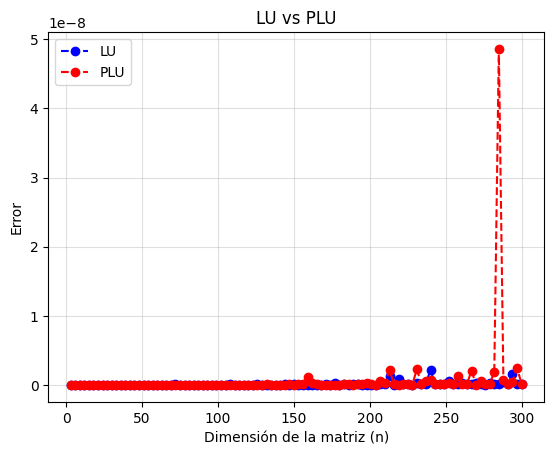

In [18]:
plt.plot(enes, errores_LU, 'b--o', label='LU')
plt.plot(enes, errores_PLU, 'r--o', label='PLU')
plt.xlabel('Dimensión de la matriz (n)')
plt.ylabel('Error')
plt.title('LU vs PLU')
plt.grid(alpha=0.4)
plt.legend()

# Solución del SEL

In [19]:
def sel(A, b):
    L, U = fact_lu(A)
    n = np.size(A[0])
    y = np.zeros((n,1))
    y[0] = b[0]
    for k in range (1,n):
        y[k] = b[k]-L[k,0:k]@y[0:k]
    x = np.zeros((n,1))
    x[n-1] = y[n-1]/U[n-1,n-1]
    for k in range(n-2,-1,-1):
        x[k] = (y[k] - U[k,k+1:n]@x[k+1:n,0])/U[k,k]
    return x, y, L, U

In [20]:
A = np.matrix([np.array([4.,5.,2.,-1.]),
               np.array([5.,8.,7.,6.]),
               np.array([3.,7.,-4.,-2.]),
               np.array([-1.,6.,-2.,5.])])
b = np.matrix([3.,2.,0.,1.]).T

In [21]:
x, y, L, U = sel(A, b)

In [22]:
x

array([[-3.12698413],
       [ 1.92063492],
       [ 1.98412698],
       [-1.93650794]])

In [23]:
y

array([[ 3.        ],
       [-1.75      ],
       [ 1.        ],
       [ 7.54639175]])

In [24]:
L

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.25      ,  1.        ,  0.        ,  0.        ],
       [ 0.75      ,  1.85714286,  1.        ,  0.        ],
       [-0.25      ,  4.14285714,  1.45360825,  1.        ]])

In [25]:
U

array([[ 4.00000000e+00,  5.00000000e+00,  2.00000000e+00,
        -1.00000000e+00],
       [ 0.00000000e+00,  1.75000000e+00,  4.50000000e+00,
         7.25000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.38571429e+01,
        -1.47142857e+01],
       [ 0.00000000e+00, -8.88178420e-16,  0.00000000e+00,
        -3.89690722e+00]])

In [26]:
A = np.matrix([np.array([1.,1.,0.,3.]),
               np.array([2.,1.,-1.,1.]),
               np.array([3.,-1.,-1.,2.]),
               np.array([-1.,2.,3.,-1.])])

b = np.matrix([8.,7.,14.,-7.]).T

x, y, L, U = sel(A, b)

In [27]:
print(x)
print(y)
print(L)
print(U)

[[ 3.]
 [-1.]
 [ 0.]
 [ 2.]]
[[  8.]
 [ -9.]
 [ 26.]
 [-26.]]
[[ 1.  0.  0.  0.]
 [ 2.  1.  0.  0.]
 [ 3.  4.  1.  0.]
 [-1. -3.  0.  1.]]
[[  1.   1.   0.   3.]
 [  0.  -1.  -1.  -5.]
 [  0.   0.   3.  13.]
 [  0.   0.   0. -13.]]
